# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [146]:
import pandas as pd 
import numpy as np
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\filip\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [264]:
df = pd.read_csv('preparação.csv')

In [175]:
df.drop('posse_de_veiculo',axis=1,inplace=True)

In [266]:
X = df.drop('mau',axis=1)

In [268]:
y = df.mau

In [270]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [272]:
clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=8)

In [274]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

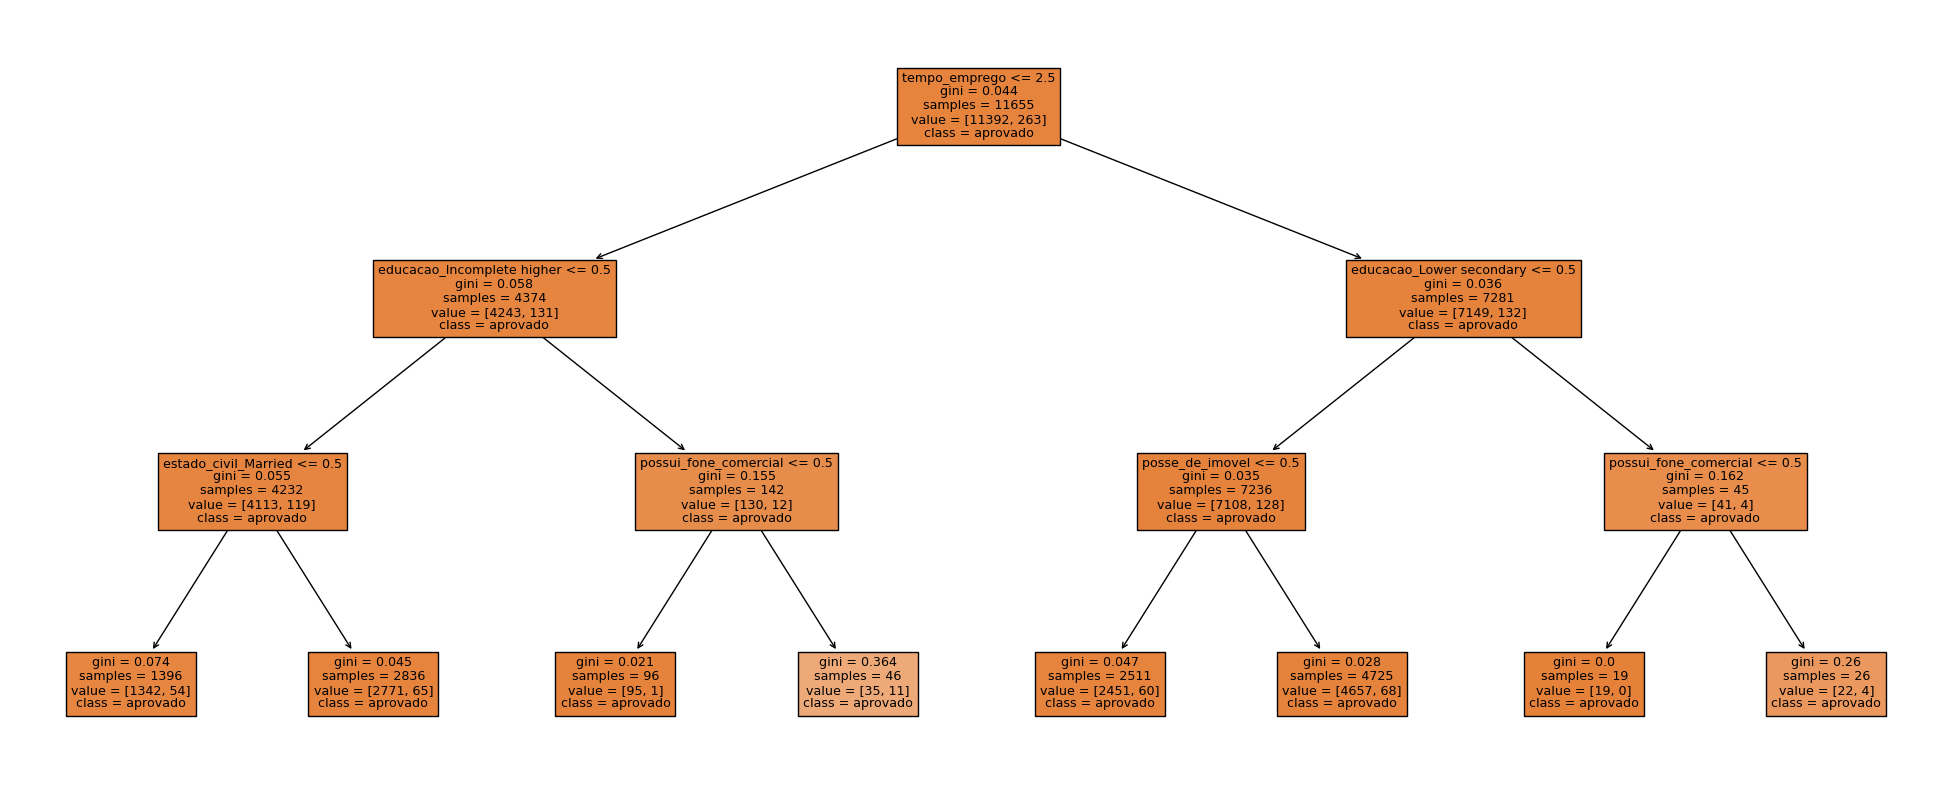

In [276]:
plt.figure(figsize=(25 ,10))
plot_tree(clf,filled=True,
          class_names=['aprovado','reprovados'],
          feature_names=X.columns);

In [242]:
y_train_pred = clf.predict(X_train)

In [208]:
accuracy_treino = accuracy_score(y_train,y_train_pred)


In [210]:
print(f'acurácia:{accuracy_treino:.2f}')

acurácia:0.98


In [212]:
print('matriz de confusão:')
print(confusion_matrix(y_train,y_train_pred))

matriz de confusão:
[[11392     0]
 [  263     0]]


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [214]:
y_pred = clf.predict(X_test)

In [216]:
acuracy_test = accuracy_score(y_test,y_pred)

In [218]:
print(f'acurácia:{acuracy_test:.2f}')

acurácia:0.97


In [278]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=123)

In [288]:
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

In [290]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

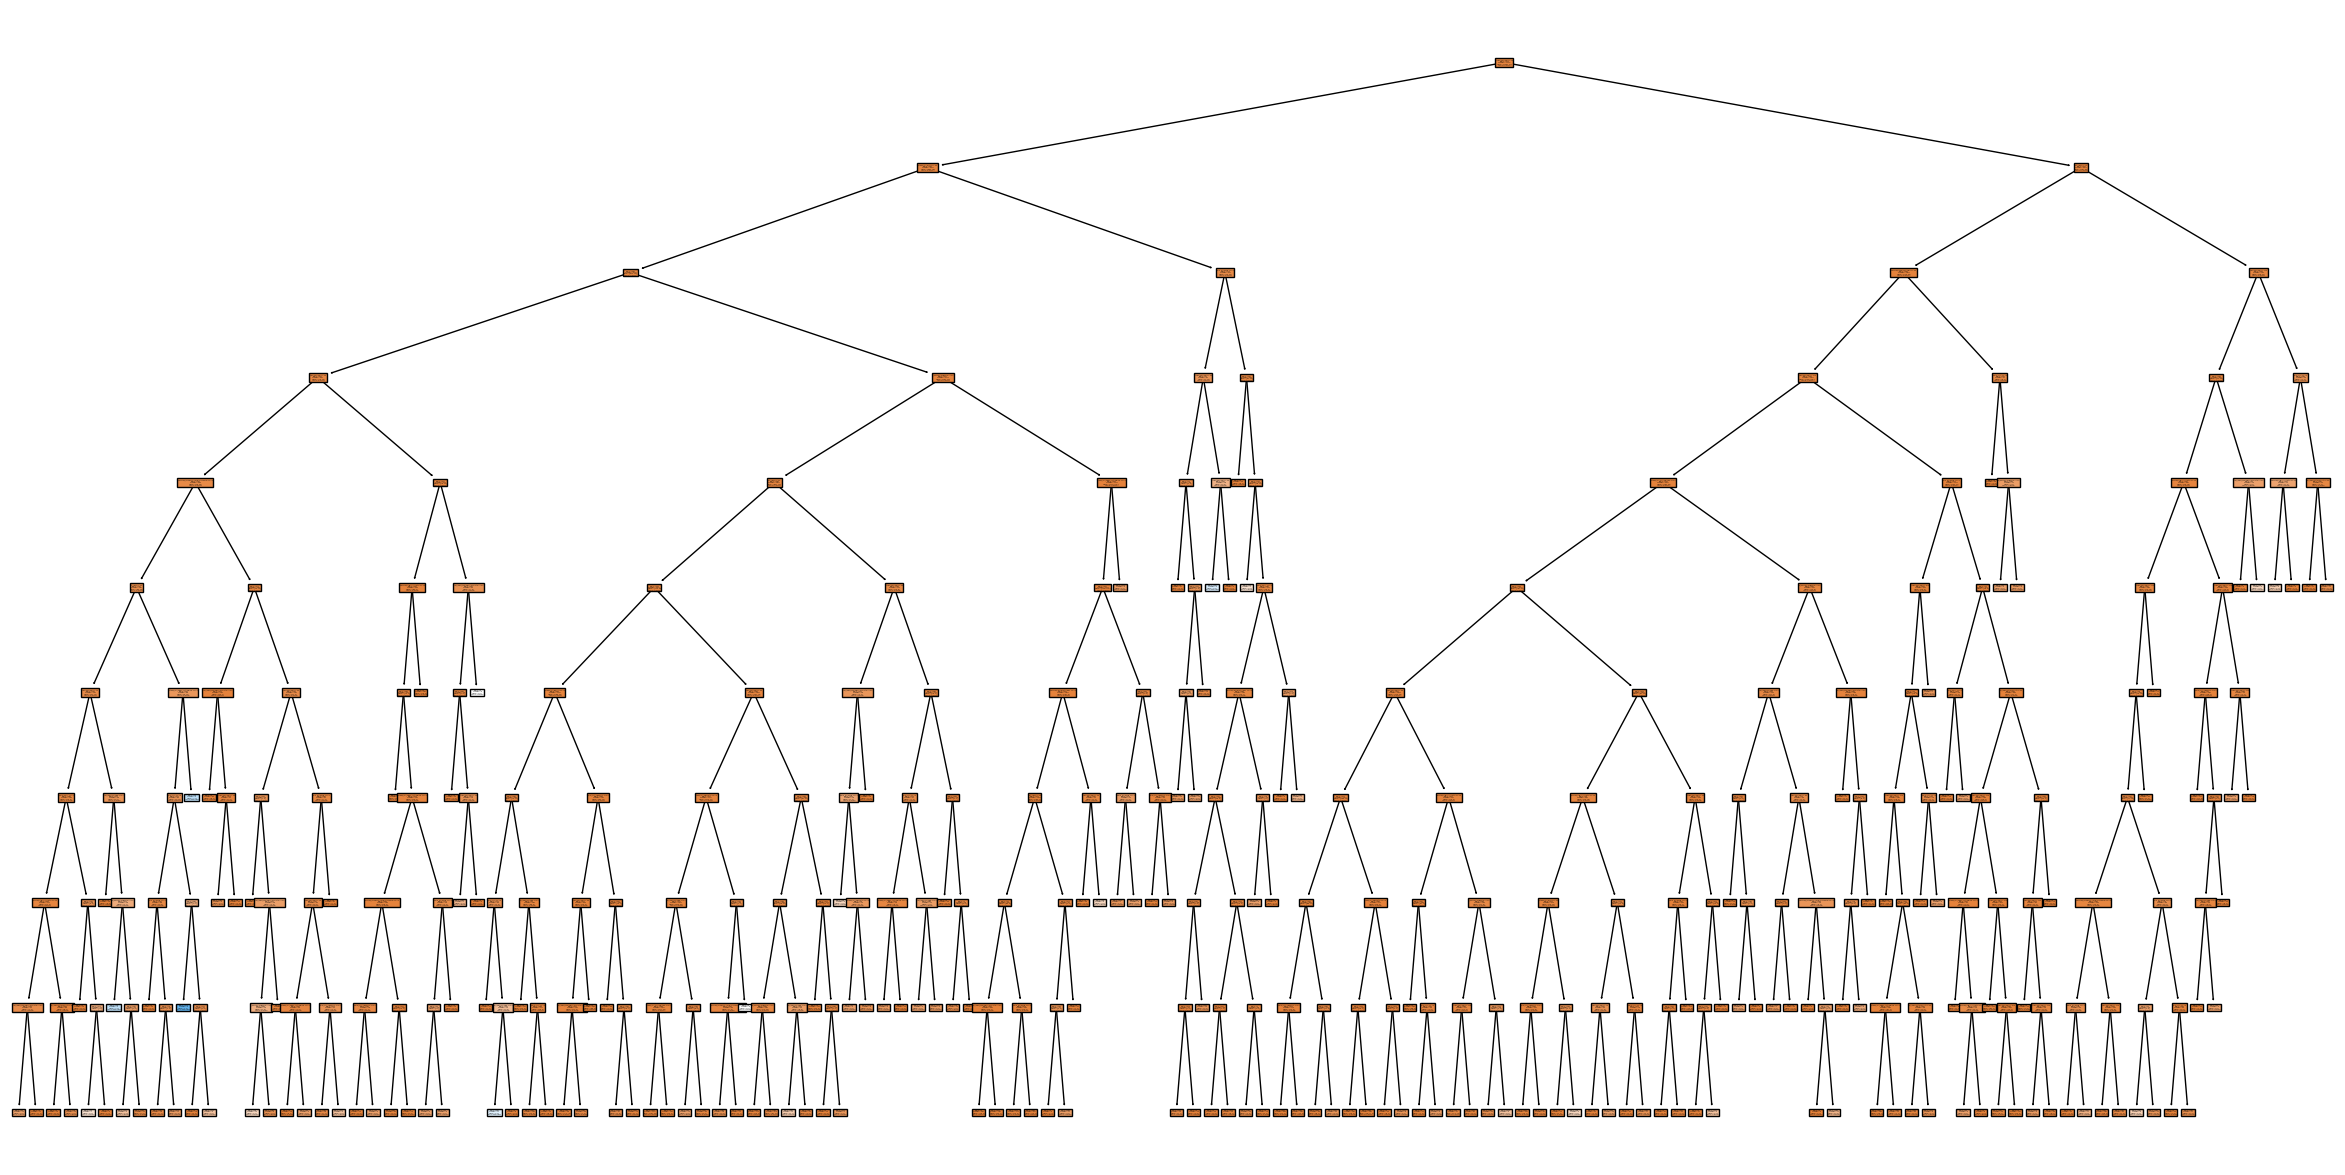

In [296]:
plt.figure(figsize=(30,15))
plot_tree(clf,filled=True,
          class_names=['aprovado','reprovados'],
          feature_names=X.columns);

In [304]:
y_pred_all_bons=[1]*len(y_test)

In [306]:
acuracy_bons= accuracy_score(y_test,y_pred_all_bons)

In [308]:
print(f'acurácia:{acuracy_bons:.2f}')

acurácia:0.02


In [ ]:
# Fiquei com algumas duvidas sobre o clf, pois parece que ele não esta avaliando direito, como posso ter certeza se esta ok?
 # tambem não conseguir fazer o plot da matriz de confusão importei as biblioteclas porem o erro continua, poderia me ajudar nessas questões ?